<a href="https://colab.research.google.com/github/diogoscsilva/FaceDetect/blob/main/FaceDetect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import imutils
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
#import PIL
#import io
#import html
#import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
      async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = 'Capture';
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        // Resize the output to fit the video element.
        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        // Wait for Capture to be clicked.
        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getVideoTracks()[0].stop();
        div.remove();
        return canvas.toDataURL('image/jpeg', quality);
      }
      ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    jpg_as_np = np.frombuffer(binary, dtype=np.uint8)
    # decode numpy array into OpenCV BGR image
    img = cv2.imdecode(jpg_as_np, flags=1)
    print(img.shape)
    # save image
    cv2.imwrite(filename, img)

    return filename

In [3]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [10]:
def detect_image (img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # get face bounding box coordinates using Haar Cascade
    faces = face_cascade.detectMultiScale(gray)
    # draw face bounding box on image
    for (x,y,w,h) in faces:
        img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

In [11]:
image_file = take_photo()

<IPython.core.display.Javascript object>

(640, 480, 3)


400 533


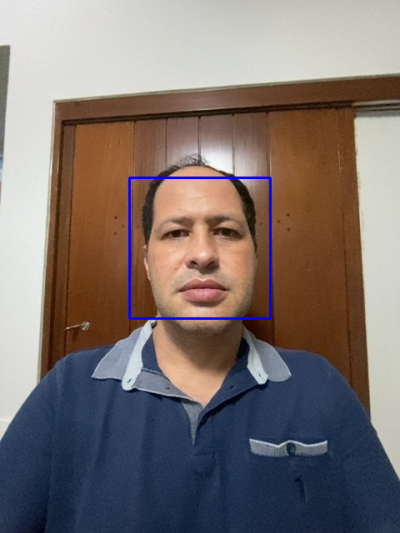

In [12]:
image = cv2.imread(image_file)
detect_image(image)
# redimensiona para ter uma largura máxima de 400 pixels
image = imutils.resize(image, width=400)
(h, w) = image.shape[:2]
print(w,h)
cv2_imshow(image)